# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

tf.logging.set_verbosity(tf.logging.INFO)

training_file = 'data/train.p'
validation_file = 'data/valid.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Exploratory Data Analysis 

In [2]:
n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]

image_shape = X_train.shape[1:3]
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


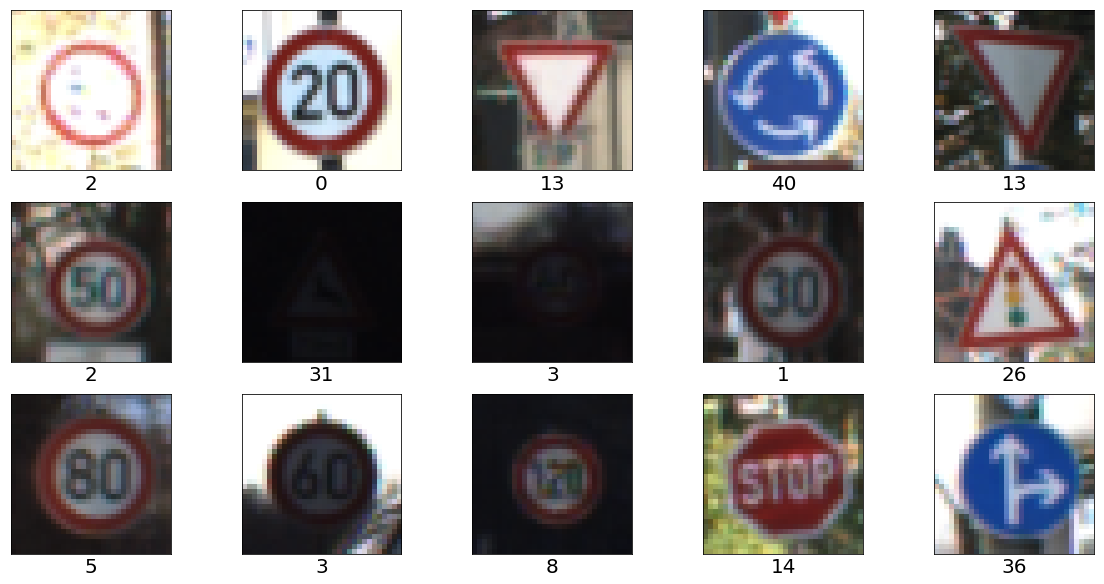

In [3]:
random_indices = np.random.randint(0, n_train, size=15)
plt.figure(figsize=(20,10))
for i, index in enumerate(random_indices, start=1):
    plt.subplot(3, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(y_train[index], color='black', fontsize=20)
    plt.imshow(X_train[index])

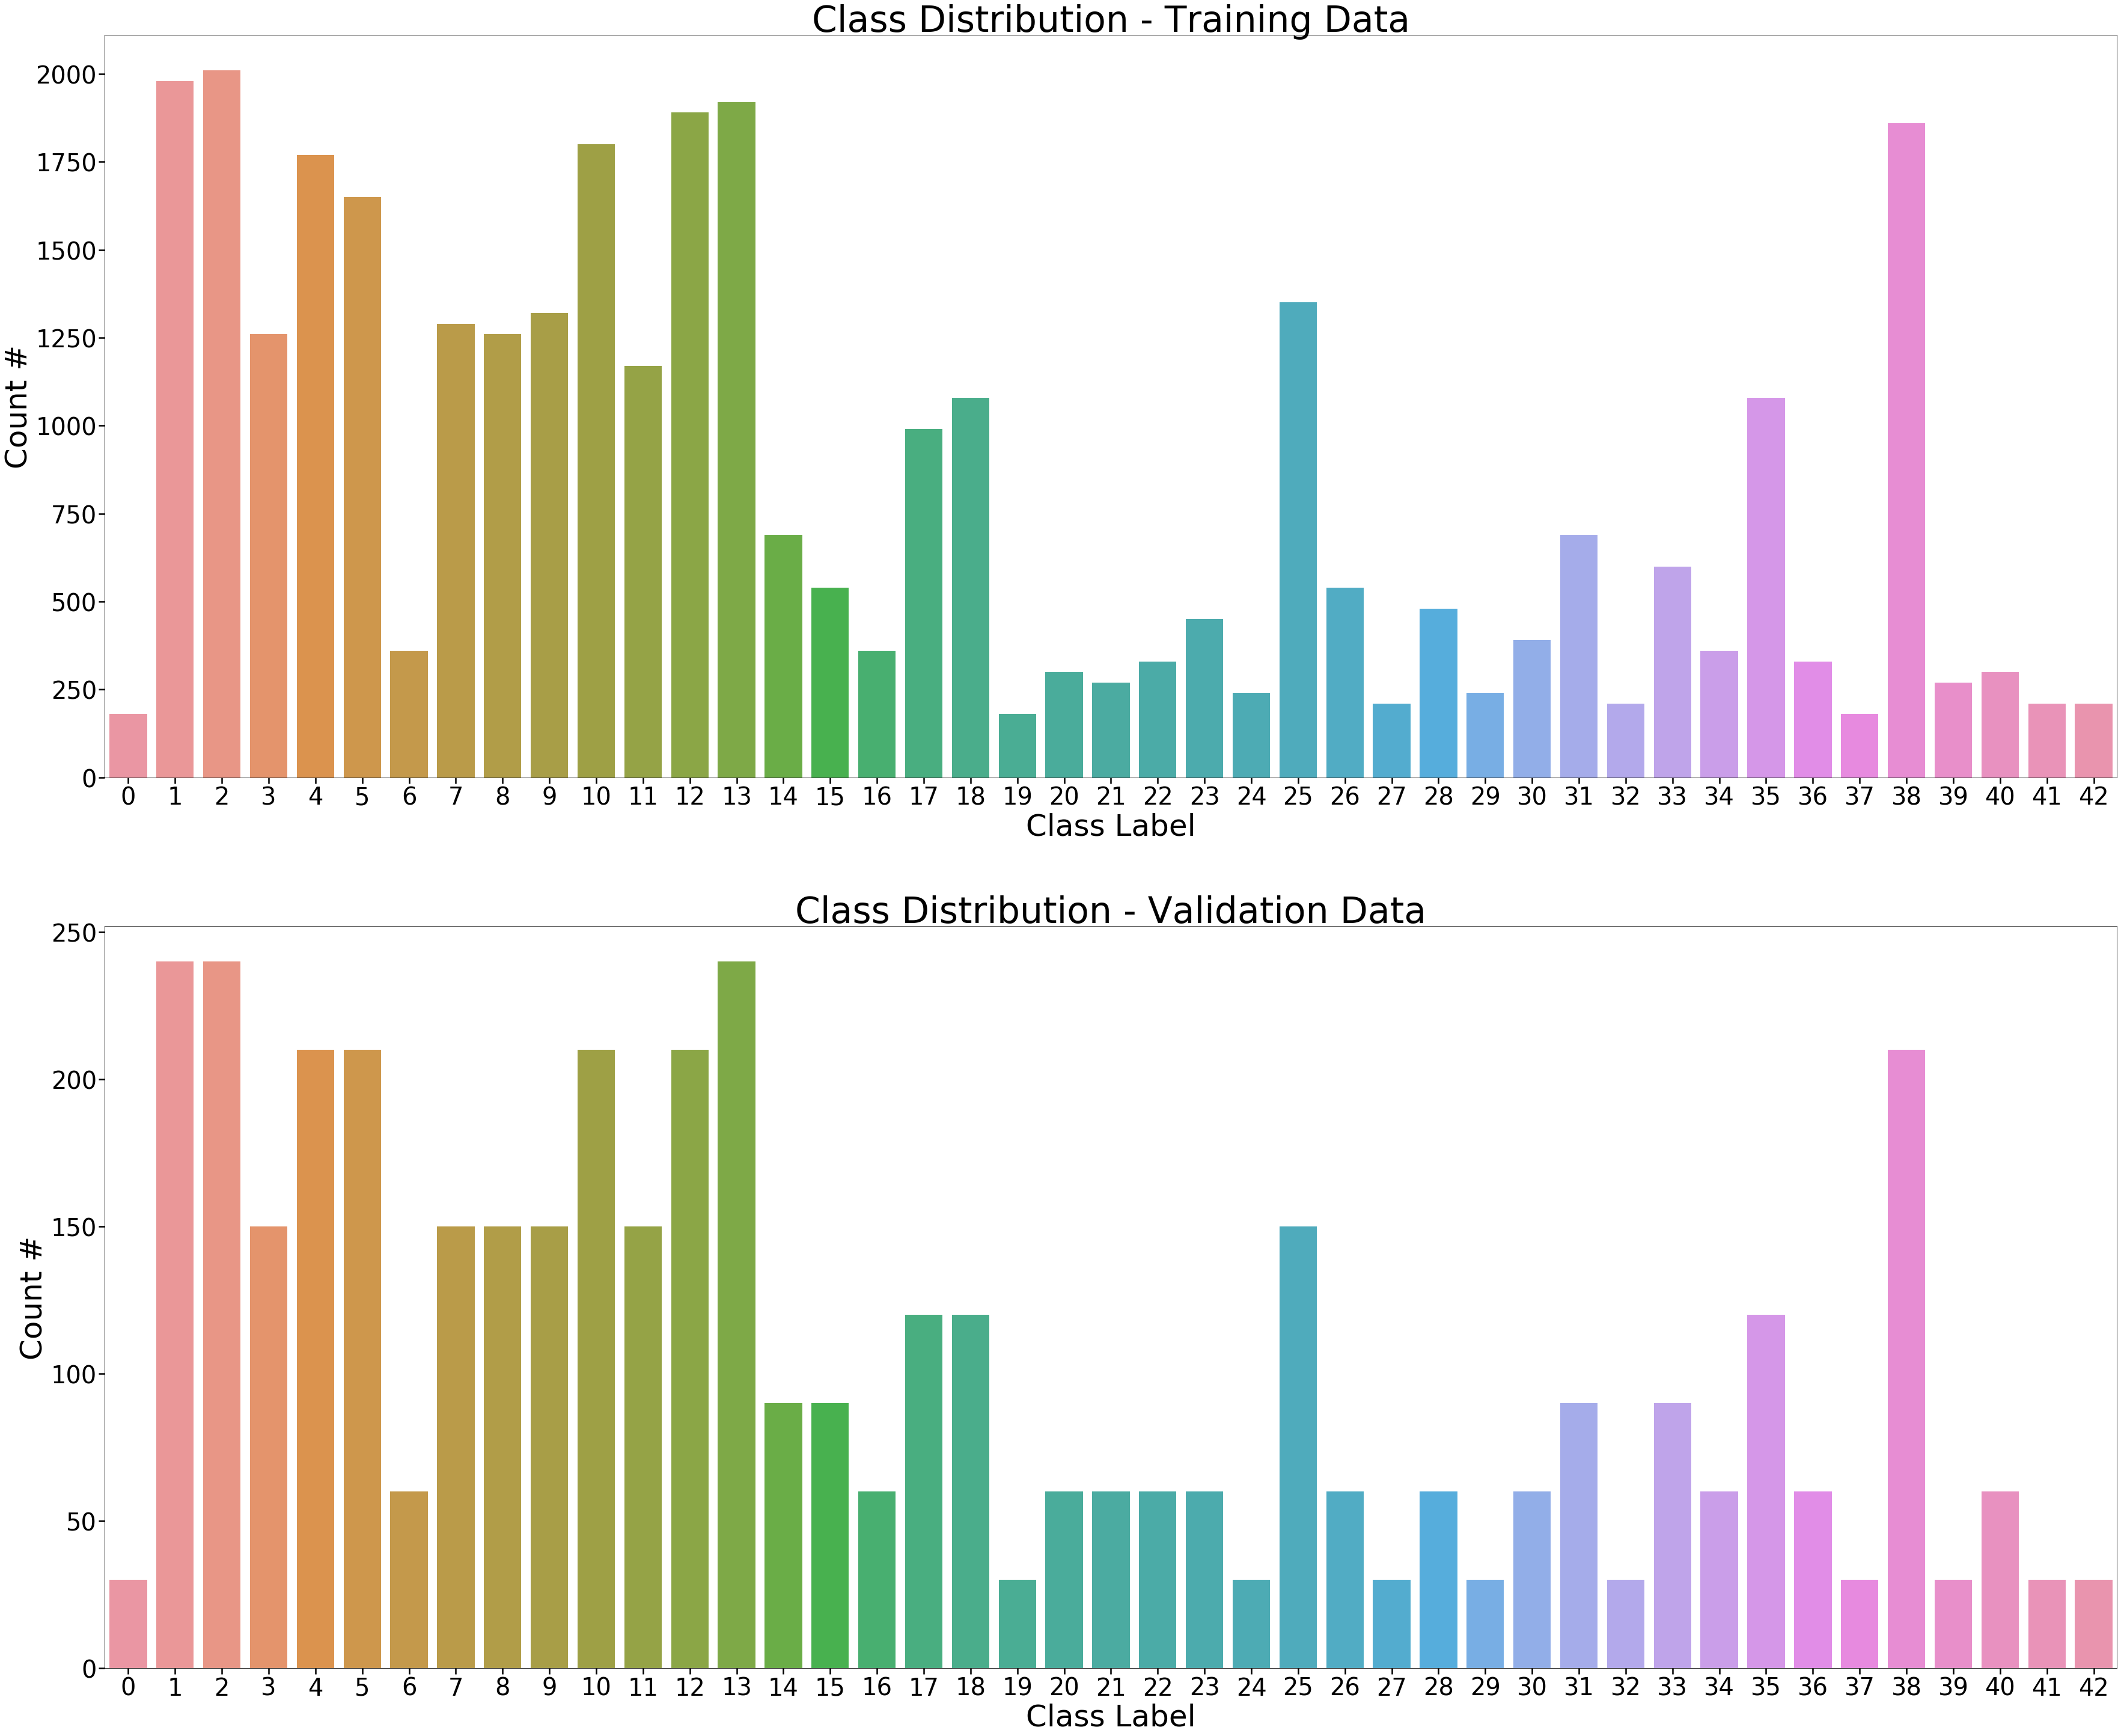

In [4]:
plt.figure(figsize=(60,50))

class_counts_train = np.unique(y_train, return_counts=True)
plt.subplot(2, 1, 1)
plt.title('Class Distribution - Training Data', fontsize=60)
plt.ylabel('Count #', fontsize=50)
plt.xlabel('Class Label', fontsize=50)
plt.tick_params(axis='both', which='both', length=10, width=2.5, labelsize=40)
sns.barplot(x=class_counts_train[0], y=class_counts_train[1])

class_counts_valid = np.unique(y_valid, return_counts=True)
plt.subplot(2, 1, 2)
plt.title('Class Distribution - Validation Data', fontsize=60)
plt.ylabel('Count #', fontsize=50)
plt.xlabel('Class Label', fontsize=50)
plt.tick_params(axis='both', which='both', length=10, width=2.5, labelsize=40)
sns.barplot(x=class_counts_valid[0], y=class_counts_valid[1])

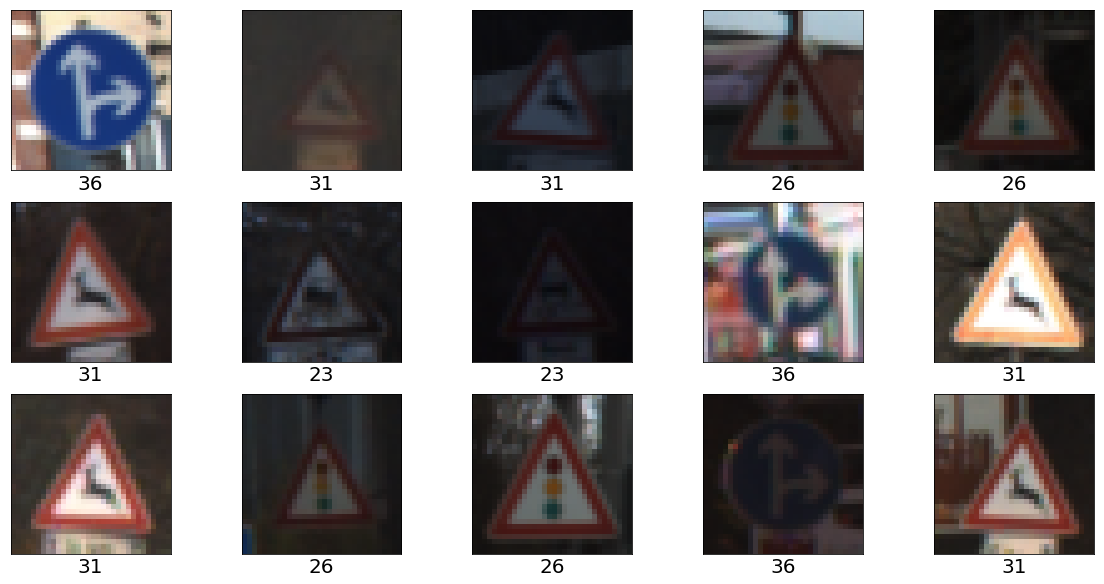

In [5]:
under_250_classes = class_counts_train[0][class_counts_train[1] < 250]
under_250_indices = np.where(np.isin(y_train, under_250_classes))[0]
random_indices = np.random.randint(0, len(under_250_indices), size=15)

plt.figure(figsize=(20,10))
for i, index in enumerate(random_indices, start=1):
    plt.subplot(3, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(y_train[index], color='black', fontsize=20)
    plt.imshow(X_train[index])

----

## Create Estimator

In [6]:
scaled_X_train = (X_train/255.).astype(np.float32)
scaled_X_valid = (X_valid/255.).astype(np.float32)
scaled_X_test = (X_test/255.).astype(np.float32)

In [7]:
hot_y_train = keras.utils.to_categorical(y_train).astype(np.float32)
hot_y_valid = keras.utils.to_categorical(y_valid).astype(np.float32)
hot_y_test = keras.utils.to_categorical(y_test).astype(np.float32)

In [8]:
image_input = keras.layers.Input(shape=(32,32,3))
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(32,32,3), name='input')(image_input)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(128, 3, padding='same', activation='relu', name='block2_conv')(x)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Conv2D(256, 3, padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
x = keras.layers.Conv2D(256, 3, padding='same', activation='relu', name='block3_conv')(x)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
x = keras.layers.MaxPool2D(2)(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
x = keras.layers.Dense(256, activation='relu', name='block4_fc')(x)
x = keras.layers.BatchNormalization(momentum=0.9)(x)
output = keras.layers.Dense(43, activation='softmax')(x)

model = keras.Model(inputs=image_input, outputs=output)

In [9]:
early_stopping = keras.callbacks.EarlyStopping('val_loss', min_delta=0.0025, patience=2, mode='min')

In [10]:
num_models = 10
model_weights = []
train_acc = []
train_loss = []
val_acc = []
val_loss = []
for i in range(num_models):
    print('\n-----------Training Model #{}-----------\n'.format(i))
    model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(scaled_X_train, hot_y_train, batch_size=64, epochs=20,
                        verbose=1, validation_data=(scaled_X_valid, hot_y_valid),
                        callbacks=[early_stopping])
    model_weights.append(model.get_weights())
    train_acc.append(history.history['acc'][-1])
    train_loss.append(history.history['loss'][-1])
    val_acc.append(history.history['val_acc'][-1])
    val_loss.append(history.history['val_loss'][-1])


-----------Training Model #0-----------

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================]34799/34799 [==============================] - 10s 295us/step - loss: 0.5246 - acc: 0.8573 - val_loss: 0.2891 - val_acc: 0.9132

Epoch 2/20
34799/34799 [==============================]34799/34799 [==============================] - 9s 249us/step - loss: 0.0335 - acc: 0.9911 - val_loss: 0.2917 - val_acc: 0.9093

Epoch 3/20
34799/34799 [==============================]34799/34799 [==============================] - 9s 245us/step - loss: 0.0206 - acc: 0.9947 - val_loss: 0.2878 - val_acc: 0.9145


-----------Training Model #1-----------

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================]34799/34799 [==============================] - 9s 257us/step - loss

34799/34799 [==============================]34799/34799 [==============================] - 8s 244us/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.1635 - val_acc: 0.9766

Epoch 6/20
34799/34799 [==============================]34799/34799 [==============================] - 8s 242us/step - loss: 0.0015 - acc: 0.9996 - val_loss: 0.1161 - val_acc: 0.9807


-----------Training Model #9-----------

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================]34799/34799 [==============================] - 9s 271us/step - loss: 0.0031 - acc: 0.9993 - val_loss: 0.1897 - val_acc: 0.9739

Epoch 2/20
34799/34799 [==============================]34799/34799 [==============================] - 8s 243us/step - loss: 0.0043 - acc: 0.9987 - val_loss: 0.1465 - val_acc: 0.9757

Epoch 3/20
34799/34799 [==============================]34799/34799 [==============================] - 8s 242us/step - loss: 0.0077 - acc: 0.9979 - val_loss: 0.1386 - val_acc: 0.9755

Epoch

In [11]:
model.set_weights(np.average(model_weights, axis=0))

In [12]:
val_loss, val_acc = model.evaluate(scaled_X_valid, hot_y_valid, verbose=1, batch_size=256)
print('Validation Loss: {}\nValidation Accuracy: {}'.format(val_loss, val_acc))

4410/4410 [==============================]4410/4410 [==============================] - 0s 64us/step

Validation Loss: 0.08919630566202189
Validation Accuracy: 0.9768707485696356


# SUBMISSION REVIEWER - PLEASE REVIEW THIS SECTION & PROVIDE INFO ON WHY THIS MAY NOT BE TRAINING PROPERLY

In [ ]:
num_epochs = 10
batch_size = 64
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'input': scaled_X_train},
    y=hot_y_train,
    shuffle=True,
    batch_size=batch_size,
    num_epochs=num_epochs,
    num_threads=1
)

valid_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'input': scaled_X_valid},
    y=hot_y_valid,
    shuffle=False,
    batch_size=batch_size,
    num_epochs=1,
    num_threads=1
)

### Model Architecture

In [ ]:
def model_fn(features, labels, mode, params):
    
    # Input layer
    input_layer = tf.cast(features['input'], tf.float32)
    
    # First convolution block
    block1_conv = tf.layers.conv2d(input_layer, 64, kernel_size=3, strides=1, padding='same',
                                   activation=tf.nn.relu, name='block1_conv1')
    block1_conv = tf.layers.batch_normalization(block1_conv, name='block1_conv1_bn')
    block1_pool = tf.layers.max_pooling2d(block1_conv, pool_size=2, strides=2, padding='valid',
                                          name='block1_pool')
    
    #Second convolution block
    block2_conv = tf.layers.conv2d(block1_pool, 128, kernel_size=3, strides=1, padding='same',
                                   activation=tf.nn.relu, name='block2_conv2')
    block2_conv = tf.layers.batch_normalization(block2_conv, name='block2_conv2_bn')
    block2_pool = tf.layers.max_pooling2d(block2_conv, pool_size=2, strides=2, padding='valid',
                                          name='block2_pool')
    
    # Second convolution block
    block3_conv = tf.layers.conv2d(block2_pool, 256, kernel_size=3, strides=1, padding='same',
                                   activation=tf.nn.relu, name='block3_conv1')
    block3_conv = tf.layers.conv2d(block3_conv, 256, kernel_size=3, strides=1, padding='same',
                                   activation=tf.nn.relu, name='block3_conv2')
    block3_pool = tf.layers.max_pooling2d(block3_conv, pool_size=2, strides=2, padding='valid',
                                          name='block3_pool')

    # Flatten layer
    flatten = tf.layers.flatten(block1_pool, name='flatten')

    # Fully-connected layers
    fc1 = tf.layers.dense(flatten, 256, activation=tf.nn.relu, name='fc1')    
    fc2 = tf.layers.dense(fc1, 256, activation=tf.nn.relu, name='fc2')
    
    # Output layer
    logits = tf.layers.dense(fc2, n_classes, activation=tf.nn.relu, name='output')
    
    predictions = {
        'classes': tf.argmax(input=logits, axis=1),
        'probabilities': tf.nn.softmax(logits, name='softmax_tensor')
    }
    
    # Return predictions if argument passed
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)
    
    loss = tf.losses.softmax_cross_entropy(onehot_labels=labels, logits=logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(params['learning_rate'])
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)
    
    # Return metrics if in evaluation mode
    eval_metric_ops = {
        'accuracy': tf.metrics.accuracy(labels=labels, predictions=predictions)
    }
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
my_estimator = tf.estimator.Estimator(model_fn, params={'learning_rate': 0.001})

In [ ]:
experiment_fn = tf.contrib.learn.Experiment(
    my_estimator,
    train_input_fn,
    eval_input_fn=valid_input_fn,
    min_eval_frequency=500
)

In [ ]:
experiment_fn.train_and_evaluate()

# END OF SPECIAL REVIEW REQUEST

---

## Test Model on New Images from Google

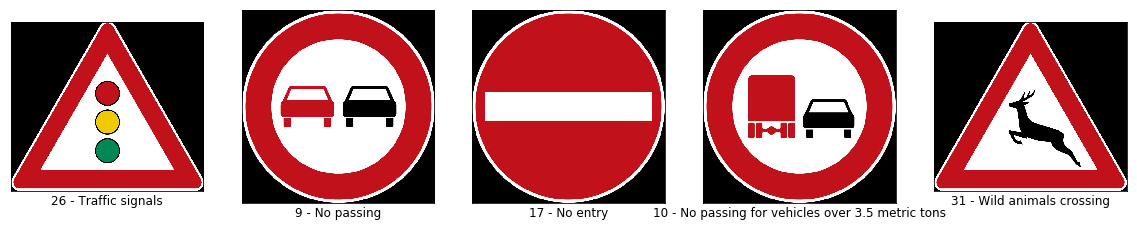

In [13]:
import os
image_files = [os.path.join('examples/', file) for file in os.listdir('examples')]
picture_classes = ['26 - Traffic signals', '9 - No passing', '17 - No entry',
                   '10 - No passing for vehicles over 3.5 metric tons',
                   '31 - Wild animals crossing']
plt.figure(figsize=(20,10))
for i, file in enumerate(image_files, start=1):
    plt.subplot(1, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel(picture_classes[i-1], color='black', fontsize=12)
    plt.imshow(plt.imread(file))

### Predictions

In [14]:
import cv2
np_images = np.array([cv2.resize(plt.imread(file), (32,32)) for file in image_files])
probabilities = model.predict(np_images/255.)
predictions = probabilities.argmax(axis=-1)

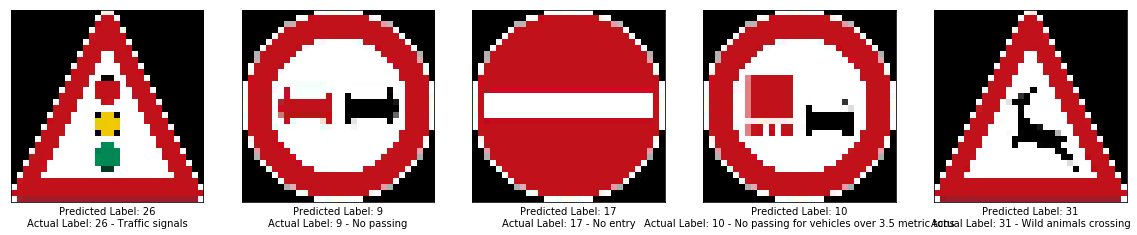

In [15]:
plt.figure(figsize=(20,10))
for i, image in enumerate(np_images, start=1):
    plt.subplot(1, 5, i)
    plt.tick_params(axis='both', which='both', bottom='off', labelbottom='off',
                    left='off', labelleft='off')
    plt.xlabel('Predicted Label: {}\nActual Label: {}'.format(predictions[i-1], picture_classes[i-1]),
               color='black', fontsize=10)
    plt.imshow(image)

The model has 100% accuracy on the five new images of perfect signs.

In [16]:
top_5_predictions = [array[:5] for array in np.argsort(-probabilities)]
for i, top_predictions in enumerate(top_5_predictions):
    print('\n-----Top 5 Predictions for Class: {}\n'.format(picture_classes[i]))
    for j, prediction in enumerate(top_predictions, start=1):
        print('(#{})\tClass: {}\t Prob: {}'.format(j, prediction, probabilities[i][prediction]))


-----Top 5 Predictions for Class: 26 - Traffic signals

(#1)	Class: 26	 Prob: 0.9778470993041992
(#2)	Class: 18	 Prob: 0.022053256630897522
(#3)	Class: 11	 Prob: 7.564348925370723e-05
(#4)	Class: 37	 Prob: 1.4495679351966828e-05
(#5)	Class: 19	 Prob: 3.543599405020359e-06

-----Top 5 Predictions for Class: 9 - No passing

(#1)	Class: 9	 Prob: 0.96968674659729
(#2)	Class: 26	 Prob: 0.014755374751985073
(#3)	Class: 41	 Prob: 0.012622907757759094
(#4)	Class: 40	 Prob: 0.001347208395600319
(#5)	Class: 1	 Prob: 0.00031818795832805336

-----Top 5 Predictions for Class: 17 - No entry

(#1)	Class: 17	 Prob: 0.9999918937683105
(#2)	Class: 19	 Prob: 5.2896734814567026e-06
(#3)	Class: 36	 Prob: 1.0500961025172728e-06
(#4)	Class: 23	 Prob: 6.088960162742296e-07
(#5)	Class: 41	 Prob: 3.282624163603032e-07

-----Top 5 Predictions for Class: 10 - No passing for vehicles over 3.5 metric tons

(#1)	Class: 10	 Prob: 0.972263514995575
(#2)	Class: 5	 Prob: 0.01810600608587265
(#3)	Class: 2	 Prob: 0.00529